#### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep", rc = {'figure.figsize':(9,6)})

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 3, Finished, Available, Finished)

#### Exploratory Data Analysis (EDA)

In [2]:
SEED = 1234
nyc_yellowtaxi_raw_df = spark.read.table("nyc_yellowtaxi_raw")
nyc_yellowtaxi_sampled_df = nyc_yellowtaxi_raw_df.sample(True, 0.001, seed=SEED)
display(nyc_yellowtaxi_sampled_df.summary())

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 6d53c472-bcf6-4a9a-9a59-7bc984be2f81)

In [4]:
nyc_yellowtaxi_sampled_pd_df = nyc_yellowtaxi_sampled_df.toPandas()
# For a Pandas DataFrame, you can return the first 10 rows using the .head() method
nyc_yellowtaxi_sampled_pd_df.head(10)

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 6, Finished, Available, Finished)

,vendorID,tpepPickupDateTime,tpepDropoffDateTime,passengerCount,tripDistance,puLocationId,doLocationId,startLon,startLat,endLon,...,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,puYear,puMonth
0,2,2016-03-10 14:55:49,2016-03-10 15:20:08,1,3.17,None,None,-73.983032,40.730713,-73.966118,...,1,17.0,0.0,0.5,0.3,3.56,0.0,21.36,2016,3
1,2,2016-03-01 07:56:46,2016-03-01 08:09:52,2,1.98,None,None,-73.962357,40.759350,-73.955963,...,2,10.5,0.0,0.5,0.3,0.00,0.0,11.30,2016,3
2,1,2016-03-01 08:39:08,2016-03-01 09:20:39,1,12.80,None,None,-73.790543,40.643726,-73.868019,...,2,39.0,0.0,0.5,0.3,0.00,0.0,39.80,2016,3
3,1,2016-03-01 13:41:03,2016-03-01 13:55:36,1,2.40,None,None,-73.977783,40.787041,-73.955635,...,1,11.5,0.0,0.5,0.3,2.45,0.0,14.75,2016,3
4,1,2016-03-01 19:40:39,2016-03-01 19:49:10,1,1.60,None,None,-73.986183,40.746487,-73.996498,...,1,7.5,1.0,0.5,0.3,1.85,0.0,11.15,2016,3
5,2,2016-03-01 13:27:12,2016-03-01 13:39:36,2,1.95,None,None,-73.991478,40.750187,-73.988091,...,1,10.0,0.0,0.5,0.3,2.16,0.0,12.96,2016,3
6,2,2016-03-10 09:21:07,2016-03-10 09:43:02,4,3.23,None,None,-73.968506,40.754692,-74.003242,...,2,16.0,0.0,0.5,0.3,0.00,0.0,16.80,2016,3
7,1,2016-03-01 06:26:59,2016-03-01 06:30:38,1,0.90,None,None,-73.954590,40.767265,-73.966309,...,1,5.0,0.0,0.5,0.3,1.45,0.0,7.25,2016,3
8,2,2016-03-01 18:32:37,2016-03-01 18:38:58,1,1.29,None,None,-74.006302,40.733582,-73.990913,...,1,6.5,1.0,0.5,0.3,1.66,0.0,9.96,2016,3
9,2,2016-03-10 12:24:11,2016-03-10 12:40:08,5,0.00,None,None,-73.980003,40.743141,-73.974854,...,1,10.0,0.0,0.5,0.3,2.16,0.0,12.96,2016,3


In [6]:
nyc_yellowtaxi_sampled_pd_df['tripDuration'] = (nyc_yellowtaxi_sampled_pd_df['tpepDropoffDateTime'] - nyc_yellowtaxi_sampled_pd_df['tpepPickupDateTime']).astype('timedelta64[ms]')

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 8, Finished, Available, Finished)

In [7]:
nyc_yellowtaxi_sampled_pd_df.head(10)

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 9, Finished, Available, Finished)

,vendorID,tpepPickupDateTime,tpepDropoffDateTime,passengerCount,tripDistance,puLocationId,doLocationId,startLon,startLat,endLon,...,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,puYear,puMonth,tripDuration
0,2,2016-03-10 14:55:49,2016-03-10 15:20:08,1,3.17,None,None,-73.983032,40.730713,-73.966118,...,17.0,0.0,0.5,0.3,3.56,0.0,21.36,2016,3,0 days 00:24:19
1,2,2016-03-01 07:56:46,2016-03-01 08:09:52,2,1.98,None,None,-73.962357,40.759350,-73.955963,...,10.5,0.0,0.5,0.3,0.00,0.0,11.30,2016,3,0 days 00:13:06
2,1,2016-03-01 08:39:08,2016-03-01 09:20:39,1,12.80,None,None,-73.790543,40.643726,-73.868019,...,39.0,0.0,0.5,0.3,0.00,0.0,39.80,2016,3,0 days 00:41:31
3,1,2016-03-01 13:41:03,2016-03-01 13:55:36,1,2.40,None,None,-73.977783,40.787041,-73.955635,...,11.5,0.0,0.5,0.3,2.45,0.0,14.75,2016,3,0 days 00:14:33
4,1,2016-03-01 19:40:39,2016-03-01 19:49:10,1,1.60,None,None,-73.986183,40.746487,-73.996498,...,7.5,1.0,0.5,0.3,1.85,0.0,11.15,2016,3,0 days 00:08:31
5,2,2016-03-01 13:27:12,2016-03-01 13:39:36,2,1.95,None,None,-73.991478,40.750187,-73.988091,...,10.0,0.0,0.5,0.3,2.16,0.0,12.96,2016,3,0 days 00:12:24
6,2,2016-03-10 09:21:07,2016-03-10 09:43:02,4,3.23,None,None,-73.968506,40.754692,-74.003242,...,16.0,0.0,0.5,0.3,0.00,0.0,16.80,2016,3,0 days 00:21:55
7,1,2016-03-01 06:26:59,2016-03-01 06:30:38,1,0.90,None,None,-73.954590,40.767265,-73.966309,...,5.0,0.0,0.5,0.3,1.45,0.0,7.25,2016,3,0 days 00:03:39
8,2,2016-03-01 18:32:37,2016-03-01 18:38:58,1,1.29,None,None,-74.006302,40.733582,-73.990913,...,6.5,1.0,0.5,0.3,1.66,0.0,9.96,2016,3,0 days 00:06:21
9,2,2016-03-10 12:24:11,2016-03-10 12:40:08,5,0.00,None,None,-73.980003,40.743141,-73.974854,...,10.0,0.0,0.5,0.3,2.16,0.0,12.96,2016,3,0 days 00:15:57


In [9]:
#create some new columns base on other data in the df
#nyc_yellowtaxi_sampled_pd_df = nyc_yellowtaxi_sampled_df.toPandas()
nyc_yellowtaxi_sampled_pd_df['tripDuration'] = (nyc_yellowtaxi_sampled_pd_df['tpepDropoffDateTime'] - nyc_yellowtaxi_sampled_pd_df['tpepPickupDateTime']).astype('timedelta64[ms]')
nyc_yellowtaxi_sampled_pd_df['pickupHour'] = nyc_yellowtaxi_sampled_pd_df['tpepPickupDateTime'].dt.hour
nyc_yellowtaxi_sampled_pd_df['dayOfWeek'] = nyc_yellowtaxi_sampled_pd_df['tpepDropoffDateTime'].dt.dayofweek

#nyc_yellowtaxi_sampled_pd_df = nyc_yellowtaxi_sampled_pd_df[nyc_yellowtaxi_sampled_pd_df["tripDuration"] > 0]
#nyc_yellowtaxi_sampled_pd_df = nyc_yellowtaxi_sampled_pd_df[nyc_yellowtaxi_sampled_pd_df["fareAmount"] > 0]

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 11, Finished, Available, Finished)

In [17]:
#filter out some rows based on their values
import pandas as pd
nyc_yellowtaxi_sampled_pd_df = nyc_yellowtaxi_sampled_pd_df[nyc_yellowtaxi_sampled_pd_df["tripDuration"] > pd.Timedelta(milliseconds=0)]
nyc_yellowtaxi_sampled_pd_df = nyc_yellowtaxi_sampled_pd_df[nyc_yellowtaxi_sampled_pd_df["fareAmount"] > 0]

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 19, Finished, Available, Finished)

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 20, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count of trips')

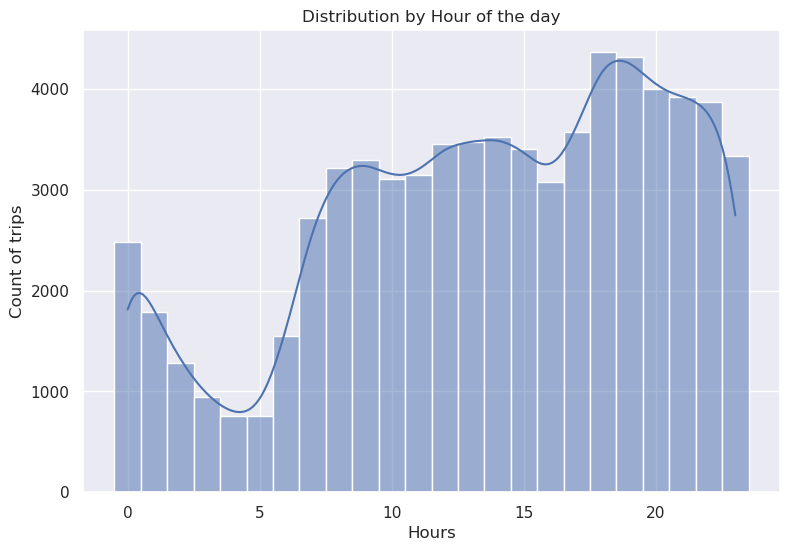

In [18]:
# creating a histogram that shows the count of taxi trips by hour of the day:
sns.histplot(data=nyc_yellowtaxi_sampled_pd_df, x="pickupHour", stat="count", discrete=True, kde=True)
plt.title("Distribution by Hour of the day")
plt.xlabel('Hours')
plt.ylabel('Count of trips')

In [20]:
#Before plotting, convert the tripDuration column to a numeric type like this:
import pandas as pd

# Convert tripDuration to seconds
nyc_yellowtaxi_sampled_pd_df["tripDurationSeconds"] = nyc_yellowtaxi_sampled_pd_df["tripDuration"] / pd.Timedelta(seconds=1)


StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 22, Finished, Available, Finished)

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 23, Finished, Available, Finished)

<Axes: xlabel='tripDistance', ylabel='tripDurationSeconds'>

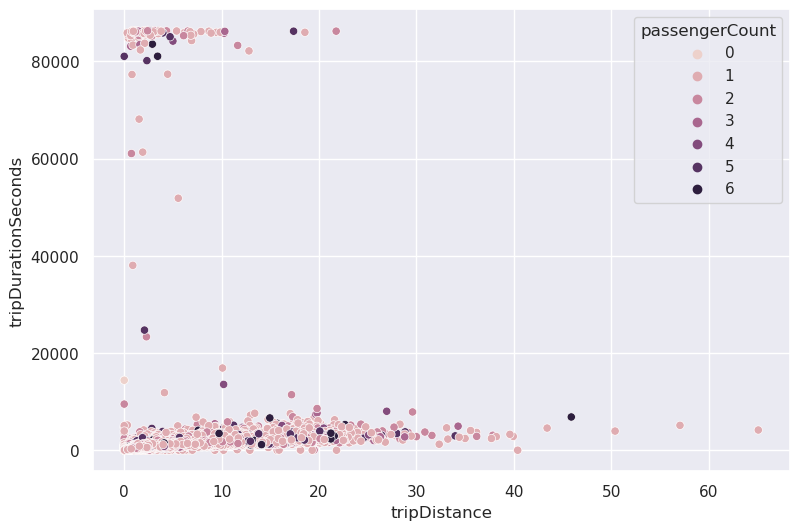

In [21]:
#create a scatterplot that shows trip duration, trip distance, and passenger count
#sns.scatterplot(data=nyc_yellowtaxi_sampled_pd_df, x="tripDistance", y="tripDuration", hue="passengerCount")
sns.scatterplot(data=nyc_yellowtaxi_sampled_pd_df, x="tripDistance", y="tripDurationSeconds", hue="passengerCount")

In [25]:
# Create a new column for duration in minutes
nyc_yellowtaxi_sampled_pd_df["tripDurationMinutes"] = nyc_yellowtaxi_sampled_pd_df["tripDurationSeconds"] / 60

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 27, Finished, Available, Finished)

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 28, Finished, Available, Finished)

[Text(0.5, 1.0, 'Distribution of Trip duration by passengerCount (outliers removed)')]

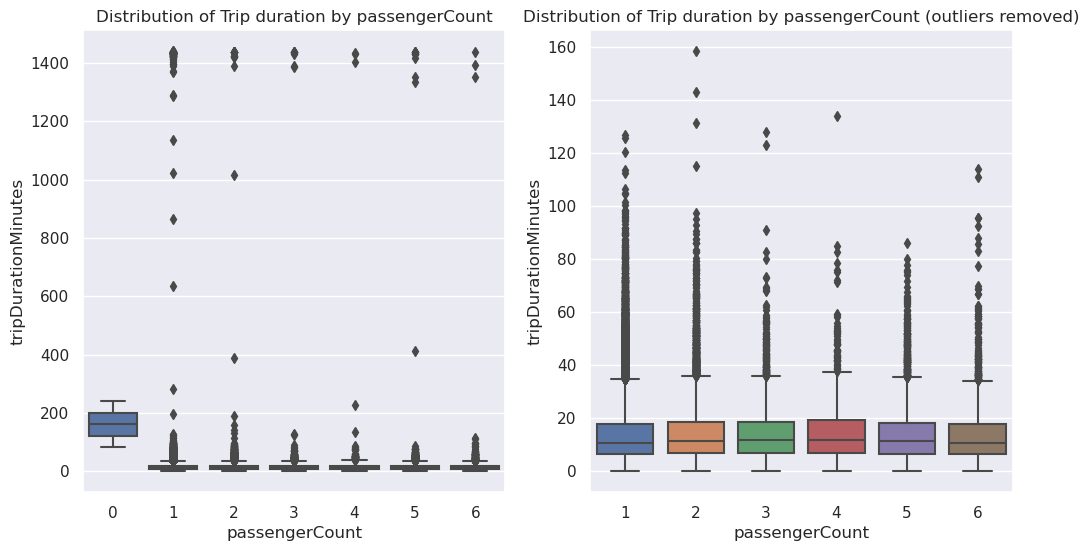

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ax=axes[0], data=nyc_yellowtaxi_sampled_pd_df, x="passengerCount", y="tripDurationMinutes").set(title='Distribution of Trip duration by passengerCount')

nyc_yellowtaxi_sampled_clean_pd_df = nyc_yellowtaxi_sampled_pd_df[(nyc_yellowtaxi_sampled_pd_df["passengerCount"] > 0) & (nyc_yellowtaxi_sampled_pd_df["tripDurationMinutes"] <= 180)]
sns.boxplot(ax=axes[1], data=nyc_yellowtaxi_sampled_clean_pd_df, x="passengerCount", y="tripDurationMinutes").set(title='Distribution of Trip duration by passengerCount (outliers removed)')

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 29, Finished, Available, Finished)

<Axes: xlabel='fareAmount', ylabel='tripDurationMinutes'>

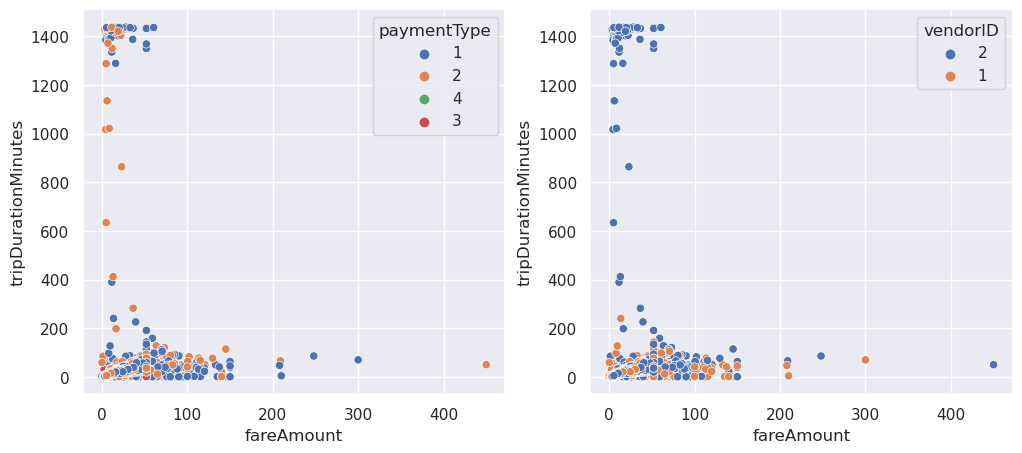

In [27]:
#Scatterplots showing fare amount and trip duration – the first one shows it by payment types, whereas the second one shows it by vendors
f, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(ax =axes[0], data=nyc_yellowtaxi_sampled_pd_df, x="fareAmount", y="tripDurationMinutes",  hue="paymentType")

sns.scatterplot(ax =axes[1],data=nyc_yellowtaxi_sampled_pd_df, x="fareAmount", y="tripDurationMinutes",  hue="vendorID")

StatementMeta(, a8df5c3b-cae9-429e-89c9-9cc4bba390de, 30, Finished, Available, Finished)

<Axes: >

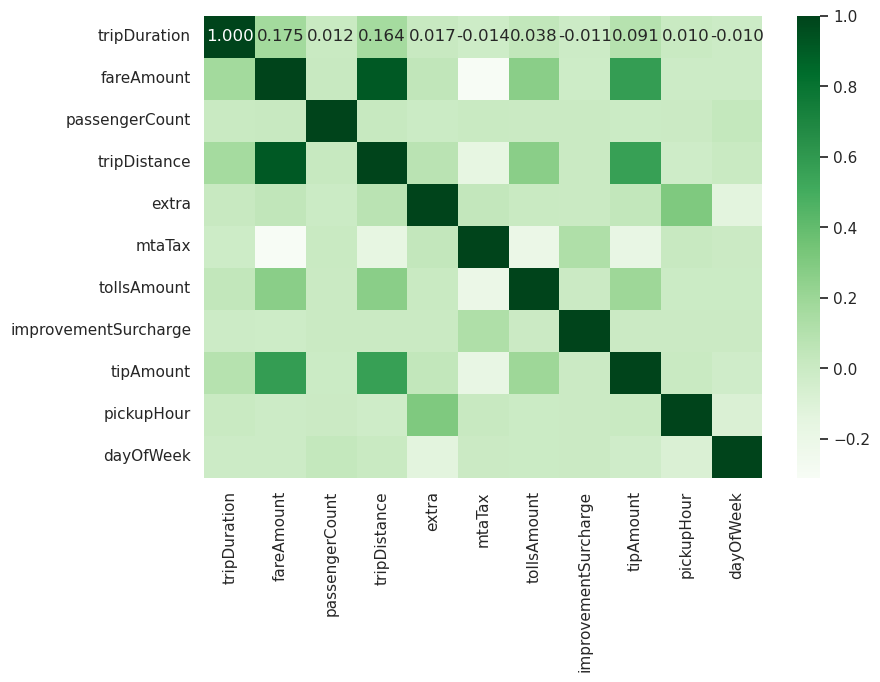

In [28]:
#Correlation graph showing the correlation among different variables in the dataset
cols_to_corr = ['tripDuration','fareAmount', 'passengerCount', 'tripDistance', 'extra', 'mtaTax', 'tollsAmount', 
       'improvementSurcharge', 'tipAmount', 'pickupHour','dayOfWeek']

sns.heatmap(data = nyc_yellowtaxi_sampled_pd_df[cols_to_corr].corr(),annot=True,fmt='.3f', cmap="Greens")